In [49]:
# 1. Import library
import pandas as pd
import numpy as np
from scipy import stats

# 2. Import Dataset
df = pd.read_csv('dataset/ab_testing_dataset_100k.csv')
df.head()

,user_id,variant,date,device,browser,country,page_view,click,add_to_cart,purchase,revenue,session_duration,impressions,traffic_source,gender,age
0,1,A,2025-01-09,Mobile,Chrome,TH,10,0,0,0,100000,122,1,TikTok Ads,M,20
1,2,B,2025-01-04,Tablet,Edge,ID,6,1,0,0,50000,325,24,Organic,F,21
2,3,A,2025-01-06,Mobile,Firefox,MY,4,0,0,0,200000,446,25,Google Ads,F,38
3,4,A,2025-01-24,Tablet,Safari,TH,2,1,1,0,50000,441,11,Organic,F,42
4,5,A,2025-01-26,Desktop,Edge,ID,5,0,0,0,100000,188,26,TikTok Ads,F,40


In [50]:
# 3. Menampilkan semua nama kolom

df.columns

Index(['user_id', 'variant', 'date', 'device', 'browser', 'country',
       'page_view', 'click', 'add_to_cart', 'purchase', 'revenue',
       'session_duration', 'impressions', 'traffic_source', 'gender', 'age'],
      dtype='object')

In [51]:
# 3. Memberikan jenis tipe kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           100000 non-null  int64 
 1   variant           100000 non-null  object
 2   date              100000 non-null  object
 3   device            100000 non-null  object
 4   browser           100000 non-null  object
 5   country           100000 non-null  object
 6   page_view         100000 non-null  int64 
 7   click             100000 non-null  int64 
 8   add_to_cart       100000 non-null  int64 
 9   purchase          100000 non-null  int64 
 10  revenue           100000 non-null  int64 
 11  session_duration  100000 non-null  int64 
 12  impressions       100000 non-null  int64 
 13  traffic_source    100000 non-null  object
 14  gender            100000 non-null  object
 15  age               100000 non-null  int64 
dtypes: int64(9), object(7)
memory usage: 12

In [52]:
# 3. Merubah Data Type

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

df.head()

,user_id,variant,date,device,browser,country,page_view,click,add_to_cart,purchase,revenue,session_duration,impressions,traffic_source,gender,age
0,1,A,2025-01-09,Mobile,Chrome,TH,10,0,0,0,100000,122,1,TikTok Ads,M,20
1,2,B,2025-01-04,Tablet,Edge,ID,6,1,0,0,50000,325,24,Organic,F,21
2,3,A,2025-01-06,Mobile,Firefox,MY,4,0,0,0,200000,446,25,Google Ads,F,38
3,4,A,2025-01-24,Tablet,Safari,TH,2,1,1,0,50000,441,11,Organic,F,42
4,5,A,2025-01-26,Desktop,Edge,ID,5,0,0,0,100000,188,26,TikTok Ads,F,40


In [53]:
# 3. Memberikan jenis tipe kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           100000 non-null  int64         
 1   variant           100000 non-null  object        
 2   date              100000 non-null  datetime64[ns]
 3   device            100000 non-null  object        
 4   browser           100000 non-null  object        
 5   country           100000 non-null  object        
 6   page_view         100000 non-null  int64         
 7   click             100000 non-null  int64         
 8   add_to_cart       100000 non-null  int64         
 9   purchase          100000 non-null  int64         
 10  revenue           100000 non-null  int64         
 11  session_duration  100000 non-null  int64         
 12  impressions       100000 non-null  int64         
 13  traffic_source    100000 non-null  object        
 14  gende

In [54]:
# 3. Mendeteksi kolom duplikasi

df.duplicated().sum()

np.int64(0)

In [55]:
# 3. Memisahkan data categorical dan numerik

nums = df.select_dtypes(include = ['number']).columns.tolist() # bukan kolom number, tetapi kolom yg mengandung number (integer & float)
cats = df.select_dtypes(exclude = ['number']).columns.tolist()

In [56]:
# 3. Deskripsikan data Numerik
round(df.describe(),2)

,user_id,date,page_view,click,add_to_cart,purchase,revenue,session_duration,impressions,age
count,100000.00,100000,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,50000.50,2025-01-15 12:14:34.367999744,7.48,0.30,0.15,0.07,124799.00,314.64,14.98,36.05
min,1.00,2025-01-01 00:00:00,1.00,0.00,0.00,0.00,0.00,30.00,1.00,18.00
25%,25000.75,2025-01-08 00:00:00,4.00,0.00,0.00,0.00,50000.00,172.00,8.00,27.00
50%,50000.50,2025-01-15 00:00:00,7.00,0.00,0.00,0.00,100000.00,315.00,15.00,36.00
75%,75000.25,2025-01-23 00:00:00,11.00,1.00,0.00,0.00,200000.00,457.00,22.00,45.00
max,100000.00,2025-01-30 00:00:00,14.00,1.00,1.00,1.00,250000.00,599.00,29.00,54.00
std,28867.66,NaN,4.03,0.46,0.36,0.26,85376.71,164.45,8.36,10.67


In [57]:
# 3. Mendeskripsikan data Categorical

df.describe(include ='object')

,variant,device,browser,country,traffic_source,gender
count,100000,100000,100000,100000,100000,100000
unique,2,3,4,5,4,2
top,B,Desktop,Edge,TH,Organic,M
freq,50063,33607,25134,20223,25268,50025


In [58]:
# 4. Melihat Missing Value 
df.isna().sum()

user_id             0
variant             0
date                0
device              0
browser             0
country             0
page_view           0
click               0
add_to_cart         0
purchase            0
revenue             0
session_duration    0
impressions         0
traffic_source      0
gender              0
age                 0
dtype: int64

In [59]:
# 5. Deteksi Outlier

# Mendeteksi dengan IQR
Q1 = df[nums].quantile(0.25)
Q3 = df[nums].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[nums] < (Q1 - 1.5 * IQR)) | (df[nums] > (Q3 + 1.5 * IQR)))
print(outliers.sum())

user_id                 0
page_view               0
click                   0
add_to_cart         15064
purchase             7061
revenue                 0
session_duration        0
impressions             0
age                     0
dtype: int64


In [60]:
# 5. Deteksi Outlier

# Mendeteksi dengan IQR
Q1 = df[nums].quantile(0.25)
Q3 = df[nums].quantile(0.75)
IQR = Q3 - Q1

# Filter baris outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outlier = df[((df[nums] < lower_bound) | (df[nums] > upper_bound)).any(axis = 1)]
print('Data Outlier: ', df_outlier.shape[0], 'baris')

Data Outlier:  21050 baris


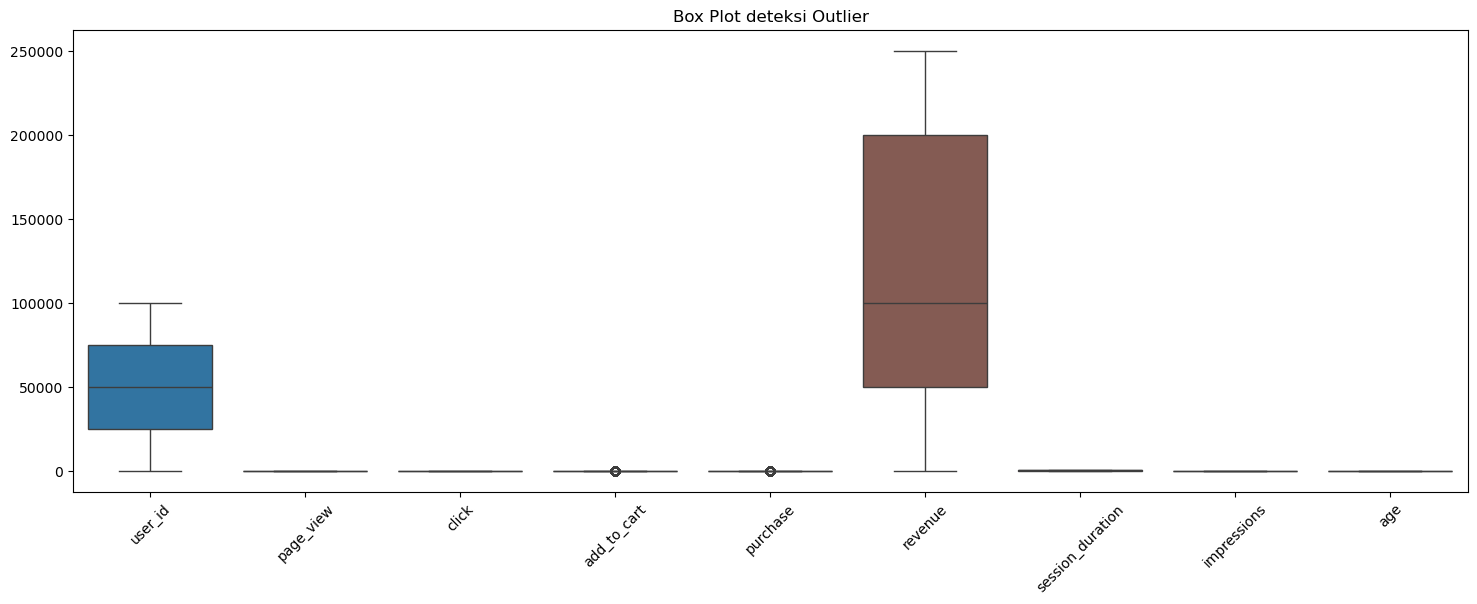

In [61]:
# Box Plot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (18, 6))
sns.boxplot(data = df[nums])
plt.title('Box Plot deteksi Outlier')
plt.xticks(rotation = 45)
plt.show()

In [62]:
# 6. Feature Engineering & Aggregasi

round(df.describe(),2)

,user_id,date,page_view,click,add_to_cart,purchase,revenue,session_duration,impressions,age
count,100000.00,100000,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,50000.50,2025-01-15 12:14:34.367999744,7.48,0.30,0.15,0.07,124799.00,314.64,14.98,36.05
min,1.00,2025-01-01 00:00:00,1.00,0.00,0.00,0.00,0.00,30.00,1.00,18.00
25%,25000.75,2025-01-08 00:00:00,4.00,0.00,0.00,0.00,50000.00,172.00,8.00,27.00
50%,50000.50,2025-01-15 00:00:00,7.00,0.00,0.00,0.00,100000.00,315.00,15.00,36.00
75%,75000.25,2025-01-23 00:00:00,11.00,1.00,0.00,0.00,200000.00,457.00,22.00,45.00
max,100000.00,2025-01-30 00:00:00,14.00,1.00,1.00,1.00,250000.00,599.00,29.00,54.00
std,28867.66,NaN,4.03,0.46,0.36,0.26,85376.71,164.45,8.36,10.67


In [63]:
# 6.2 Membuat kolom baru 

# Durasi Screen Time Hari
df['session_duration_level'] = df['session_duration'].apply(
    lambda x: 'High' if x >= 457 else ('Medium' if x >= 315 else 'Low')
)

# Buat kategori umur
df['age_group'] = pd.cut(df['age'], bins = [17, 24, 34, 44, 54], labels = ['Teenage', 'Early_Adults', 'Mid_Adults', 'Late_Adults'])



df['interaction_rate'] = (df['click'] + df['add_to_cart']) / (df['page_view'] + 1)


df.head()

,user_id,variant,date,device,browser,country,page_view,click,add_to_cart,purchase,revenue,session_duration,impressions,traffic_source,gender,age,session_duration_level,age_group,interaction_rate
0,1,A,2025-01-09,Mobile,Chrome,TH,10,0,0,0,100000,122,1,TikTok Ads,M,20,Low,Teenage,0.000000
1,2,B,2025-01-04,Tablet,Edge,ID,6,1,0,0,50000,325,24,Organic,F,21,Medium,Teenage,0.142857
2,3,A,2025-01-06,Mobile,Firefox,MY,4,0,0,0,200000,446,25,Google Ads,F,38,Medium,Mid_Adults,0.000000
3,4,A,2025-01-24,Tablet,Safari,TH,2,1,1,0,50000,441,11,Organic,F,42,Medium,Mid_Adults,0.666667
4,5,A,2025-01-26,Desktop,Edge,ID,5,0,0,0,100000,188,26,TikTok Ads,F,40,Low,Mid_Adults,0.000000


In [64]:

# 1. Jika click = 0 tapi add_to_cart = 1 atau purchase = 1 → click = 1
df.loc[(df['click'] == 0) & ((df['add_to_cart'] > 0) | (df['purchase'] > 0)), 'click'] = 1

# 2. Jika add_to_cart = 0 tapi purchase = 1 → add_to_cart = 1
df.loc[(df['add_to_cart'] == 0) & (df['purchase'] > 0), 'add_to_cart'] = 1

# 3. Jika purchase = 0 tapi revenue > 0 → revenue = 0
df.loc[(df['purchase'] == 0) & (df['revenue'] > 0), 'revenue'] = 0

df.head()


,user_id,variant,date,device,browser,country,page_view,click,add_to_cart,purchase,revenue,session_duration,impressions,traffic_source,gender,age,session_duration_level,age_group,interaction_rate
0,1,A,2025-01-09,Mobile,Chrome,TH,10,0,0,0,0,122,1,TikTok Ads,M,20,Low,Teenage,0.000000
1,2,B,2025-01-04,Tablet,Edge,ID,6,1,0,0,0,325,24,Organic,F,21,Medium,Teenage,0.142857
2,3,A,2025-01-06,Mobile,Firefox,MY,4,0,0,0,0,446,25,Google Ads,F,38,Medium,Mid_Adults,0.000000
3,4,A,2025-01-24,Tablet,Safari,TH,2,1,1,0,0,441,11,Organic,F,42,Medium,Mid_Adults,0.666667
4,5,A,2025-01-26,Desktop,Edge,ID,5,0,0,0,0,188,26,TikTok Ads,F,40,Low,Mid_Adults,0.000000


In [65]:
# 6.1 Menghitung Variant

df.groupby('variant').count().reset_index()

,variant,user_id,date,device,browser,country,page_view,click,add_to_cart,purchase,revenue,session_duration,impressions,traffic_source,gender,age,session_duration_level,age_group,interaction_rate
0,A,49937,49937,49937,49937,49937,49937,49937,49937,49937,49937,49937,49937,49937,49937,49937,49937,49937,49937
1,B,50063,50063,50063,50063,50063,50063,50063,50063,50063,50063,50063,50063,50063,50063,50063,50063,50063,50063


In [66]:
# 6.1 Menghitung Purchase

df.groupby('purchase').count().reset_index()

,purchase,user_id,variant,date,device,browser,country,page_view,click,add_to_cart,revenue,session_duration,impressions,traffic_source,gender,age,session_duration_level,age_group,interaction_rate
0,0,92939,92939,92939,92939,92939,92939,92939,92939,92939,92939,92939,92939,92939,92939,92939,92939,92939,92939
1,1,7061,7061,7061,7061,7061,7061,7061,7061,7061,7061,7061,7061,7061,7061,7061,7061,7061,7061


In [67]:
round(df.describe(),2)

,user_id,date,page_view,click,add_to_cart,purchase,revenue,session_duration,impressions,age,interaction_rate
count,100000.00,100000,100000.00,100000.00,100000.00,100000.00,100000.0,100000.00,100000.00,100000.00,100000.00
mean,50000.50,2025-01-15 12:14:34.367999744,7.48,0.45,0.21,0.07,8818.0,314.64,14.98,36.05,0.07
min,1.00,2025-01-01 00:00:00,1.00,0.00,0.00,0.00,0.0,30.00,1.00,18.00,0.00
25%,25000.75,2025-01-08 00:00:00,4.00,0.00,0.00,0.00,0.0,172.00,8.00,27.00,0.00
50%,50000.50,2025-01-15 00:00:00,7.00,0.00,0.00,0.00,0.0,315.00,15.00,36.00,0.00
75%,75000.25,2025-01-23 00:00:00,11.00,1.00,0.00,0.00,0.0,457.00,22.00,45.00,0.11
max,100000.00,2025-01-30 00:00:00,14.00,1.00,1.00,1.00,250000.0,599.00,29.00,54.00,1.00
std,28867.66,NaN,4.03,0.50,0.41,0.26,39278.6,164.45,8.36,10.67,0.13


In [68]:
df_clean = df.copy()
df_clean.to_csv('AB_testing_cleaned2.csv',index = False)

df_clean

,user_id,variant,date,device,browser,country,page_view,click,add_to_cart,purchase,revenue,session_duration,impressions,traffic_source,gender,age,session_duration_level,age_group,interaction_rate
0,1,A,2025-01-09,Mobile,Chrome,TH,10,0,0,0,0,122,1,TikTok Ads,M,20,Low,Teenage,0.000000
1,2,B,2025-01-04,Tablet,Edge,ID,6,1,0,0,0,325,24,Organic,F,21,Medium,Teenage,0.142857
2,3,A,2025-01-06,Mobile,Firefox,MY,4,0,0,0,0,446,25,Google Ads,F,38,Medium,Mid_Adults,0.000000
3,4,A,2025-01-24,Tablet,Safari,TH,2,1,1,0,0,441,11,Organic,F,42,Medium,Mid_Adults,0.666667
4,5,A,2025-01-26,Desktop,Edge,ID,5,0,0,0,0,188,26,TikTok Ads,F,40,Low,Mid_Adults,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,A,2025-01-11,Desktop,Chrome,ID,12,0,0,0,0,177,26,TikTok Ads,F,47,Low,Late_Adults,0.000000
99996,99997,B,2025-01-22,Desktop,Chrome,PH,5,1,1,1,100000,255,28,TikTok Ads,F,51,Low,Late_Adults,0.000000
99997,99998,A,2025-01-20,Tablet,Firefox,SG,13,0,0,0,0,205,28,Instagram,M,38,Low,Mid_Adults,0.000000
99998,99999,B,2025-01-02,Mobile,Chrome,TH,10,1,1,0,0,559,18,Instagram,M,47,High,Late_Adults,0.090909


In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   user_id                 100000 non-null  int64         
 1   variant                 100000 non-null  object        
 2   date                    100000 non-null  datetime64[ns]
 3   device                  100000 non-null  object        
 4   browser                 100000 non-null  object        
 5   country                 100000 non-null  object        
 6   page_view               100000 non-null  int64         
 7   click                   100000 non-null  int64         
 8   add_to_cart             100000 non-null  int64         
 9   purchase                100000 non-null  int64         
 10  revenue                 100000 non-null  int64         
 11  session_duration        100000 non-null  int64         
 12  impressions             100000 

In [ ]:
# Kolom A dan B
df['impressions_A'] = df.apply(lambda x: x['impressions'] if x['variant']=='A' else 0, axis=1)
df['impressions_B'] = df.apply(lambda x: x['impressions'] if x['variant']=='B' else 0, axis=1)

df['click_A'] = df.apply(lambda x: x['click'] if x['variant'] == 'A' else 0, axis=1)
df['click_B'] = df.apply(lambda x: x['click'] if x['variant'] == 'B' else 0, axis=1)

df['add_to_cart_A'] =  df.apply(lambda x: x['add_to_cart'] if x['variant'] == 'A' else 0, axis=1)
df['add_to_cart_B'] =  df.apply(lambda x: x['add_to_cart'] if x['variant'] == 'B' else 0, axis=1)

df['purchase_A'] = df.apply(lambda x: x['purchase'] if x['variant']=='A' else 0, axis=1)
df['purchase_B'] = df.apply(lambda x: x['purchase'] if x['variant']=='B' else 0, axis=1)

df['revenue_A'] =  df.apply(lambda x: x['revenue'] if x['variant'] == 'A' else 0, axis=1)
df['revenue_B'] =  df.apply(lambda x: x['revenue'] if x['variant'] == 'B' else 0, axis=1)

df['page_view_A'] = df.apply(lambda x: x['page_view'] if x['variant']=='A' else 0, axis=1)
df['page_view_B'] = df.apply(lambda x: x['page_view'] if x['variant']=='B' else 0, axis=1)

df['session_duration_A'] =  df.apply(lambda x: x['session_duration'] if x['variant'] == 'A' else 0, axis=1)
df['session_duration_B'] =  df.apply(lambda x: x['session_duration'] if x['variant'] == 'B' else 0, axis=1)